In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

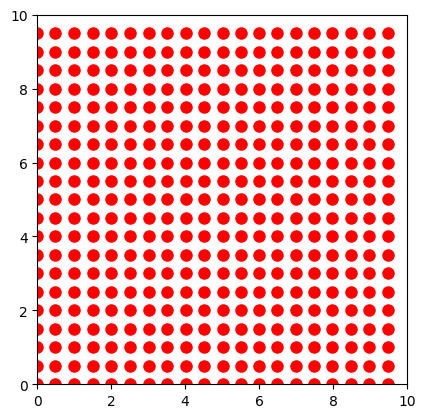

In [56]:
x_pos = np.array([])
y_pos = np.array([])
for i in range(20):
    for j in range(20):
        x_pos = np.append(x_pos, i/2)
        y_pos = np.append(y_pos, j/2)


# Initialize the figure and axis
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'ro', ms=8)
# Initialize the plot limits and labels
def init():
   ax.set_xlim(0, 10)
   ax.set_ylim(0, 10)
   ax.set_aspect('equal', adjustable='box')
   return ln,
# Update the data for each frame
def update(t):
   global x_pos, y_pos
   ky = 0#np.pi/2
   kx = np.pi/4
   omega_y = ky/2
   omega_x = kx/2
   #phase_y = np.random.rand(len(y_pos))/5
   #phase_x = np.random.rand(len(x_pos))/5
   phase_y = ky * y_pos - omega_y * t
   phase_x = kx * x_pos - omega_x * t
   ydata = y_pos + 0.02 * np.sin(phase_y)
   xdata = x_pos + 0.02 * np.sin(phase_x)
   ln.set_data(xdata, ydata)
   return ln,
# Create the animation
ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 20, 200), init_func=init, blit=True)
# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=20,
                                 metadata=dict(artist='Me'),
                                 bitrate=1800)
ani.save('scatter.gif', writer=writer)